# 线性回归模型
 

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [4]:
# generate data
NUM_POINTS = 1000
vector = pd.DataFrame({"x": [np.random.normal(0.0, 0.55) for _ in range(NUM_POINTS)]})
vector["y"] = vector["x"].apply(lambda x: x * 0.1 + 0.3 + np.random.normal(0.0, 0.03))
print(vector.head())


          x         y
0 -0.577493  0.230219
1  0.514514  0.359003
2 -0.040150  0.251488
3 -0.584096  0.244105
4  1.086325  0.415558


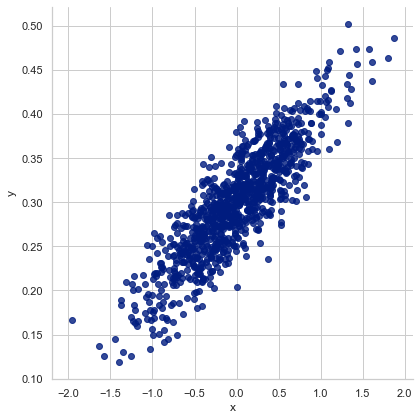

In [7]:
# plot data
sns.set(context="notebook", style="whitegrid", palette="dark")
sns.lmplot('x', 'y', vector, height=6, fit_reg=False)
plt.show()


# 创建线性回归模型


In [14]:
alpha = 0.1
epoch = 500

# concat ones' column
ones = pd.DataFrame({'ones': np.ones(len(vector))})
df = pd.concat([ones, vector], axis=1)

x_data = np.array(df[df.columns[0:2]])
y_data = np.array(df[df.columns[-1]]).reshape(-1, 1)

print(x_data.shape, type(x_data))
print(y_data.shape, type(y_data))


(1000, 2) <class 'numpy.ndarray'>
(1000, 1) <class 'numpy.ndarray'>


In [15]:

with tf.name_scope('input'):
    X = tf.placeholder(tf.float32, shape=x_data.shape, name="x")
    Y = tf.placeholder(tf.float32, shape=y_data.shape, name="y")

with tf.name_scope('hypothesis'):
    W = tf.get_variable("weight2", shape=(x_data.shape[1], 1), initializer=tf.constant_initializer)
    y_pred = tf.matmul(X, W)

with tf.name_scope('loss'):
    # 最小二乘法
    # loss_op = 1 / (2 * len(x_data)) * tf.matmul(y_pred - Y, y_pred - Y, transpose_a=True)
    loss_op = tf.reduce_mean(tf.square(y_pred - Y))
    
with tf.name_scope('train'):
    opt = tf.train.GradientDescentOptimizer(learning_rate=alpha)
    train_op = opt.minimize(loss_op)


In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # train model
    for e in range(1, epoch+1):
        sess.run(train_op, feed_dict={X: x_data, Y: y_data})
        if e % 10 == 0:
            loss, w = sess.run([loss_op, W], feed_dict={X: x_data, Y: y_data})
            log_str = "Epoch %d \t Loss=%.4g \t Model: y = %.4gx + %.4g"
            print(log_str % (e, loss, w[1], w[0]))


Epoch 10 	 Loss=0.002853 	 Model: y = 0.0443x + 0.2678
Epoch 20 	 Loss=0.001192 	 Model: y = 0.06929x + 0.2968
Epoch 30 	 Loss=0.0009938 	 Model: y = 0.08293x + 0.3
Epoch 40 	 Loss=0.0009389 	 Model: y = 0.09033x + 0.3004
Epoch 50 	 Loss=0.0009228 	 Model: y = 0.09433x + 0.3004
Epoch 60 	 Loss=0.0009181 	 Model: y = 0.0965x + 0.3005
Epoch 70 	 Loss=0.0009168 	 Model: y = 0.09767x + 0.3005
Epoch 80 	 Loss=0.0009164 	 Model: y = 0.09831x + 0.3005
Epoch 90 	 Loss=0.0009162 	 Model: y = 0.09865x + 0.3005
Epoch 100 	 Loss=0.0009162 	 Model: y = 0.09884x + 0.3005
Epoch 110 	 Loss=0.0009162 	 Model: y = 0.09894x + 0.3005
Epoch 120 	 Loss=0.0009162 	 Model: y = 0.09899x + 0.3005
Epoch 130 	 Loss=0.0009162 	 Model: y = 0.09902x + 0.3005
Epoch 140 	 Loss=0.0009162 	 Model: y = 0.09904x + 0.3005
Epoch 150 	 Loss=0.0009162 	 Model: y = 0.09905x + 0.3005
Epoch 160 	 Loss=0.0009162 	 Model: y = 0.09905x + 0.3005
Epoch 170 	 Loss=0.0009162 	 Model: y = 0.09906x + 0.3005
Epoch 180 	 Loss=0.0009162 	 M